In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

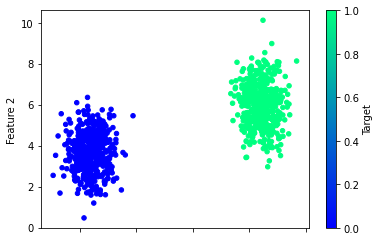

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y


%matplotlib inline

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5208 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 1.0000
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0862 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

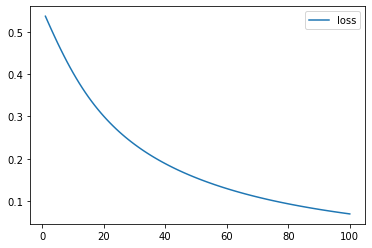

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

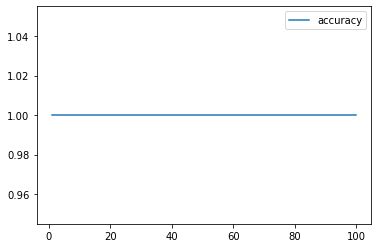

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

### Creating Moon NN

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

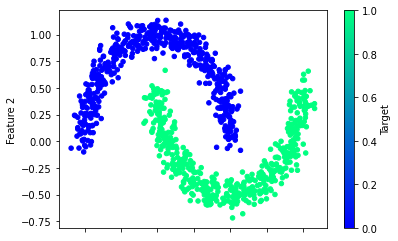

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9175 - accuracy: 0.5627
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7968 - accuracy: 0.5893
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.6147
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6360
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.6507
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.6773
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.6840
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.6920
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7013
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7107
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.8907
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8920
Epoch 92/100


<AxesSubplot:>

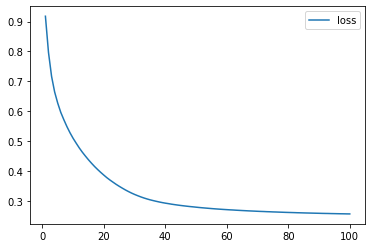

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

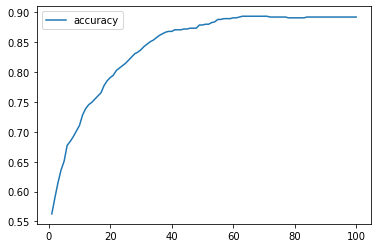

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

### Adding new layers to the Moon Neural Network

In [20]:


# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7250 - accuracy: 0.6200
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.6560
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.6840
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7040
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.7240
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5438 - accuracy: 0.7560
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7853
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.8093
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.8213
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8360
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9040
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2132 - accuracy: 0.9040
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2120 - accuracy: 0.9067
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2110 - accuracy: 0.9067
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2099 - accuracy: 0.9067
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2086 - accuracy: 0.9067
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2076 - accuracy: 0.9067
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2064 - accuracy: 0.9067
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2051 - accuracy: 0.9067
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9067
Epoch 91/100
